# 1_AppliedNLP_Session2_Bi_Trigrams

This notebook analyzes the most frequent **bigrams** and **trigrams** in *War and Peace* and *Anna Karenina* by Leo Tolstoy. The structure follows the same logic as `01_frequent_words(1).ipynb`.

In [9]:
from pathlib import Path
import re
from collections import Counter
import matplotlib.pyplot as plt

# automatically find project root and data folder
nb_path = Path.cwd()
project_root = nb_path
for _ in range(4):
    if (project_root / "data").exists():
        break
    project_root = project_root.parent

data_dir = project_root / "data"
results_dir = project_root / "results"

results_dir.mkdir(exist_ok=True)

print("Project root:", project_root)
print("Data folder:", data_dir)
print("Results folder:", results_dir)


Project root: c:\Users\Omen\Documents\GitHub\SecondProject
Data folder: c:\Users\Omen\Documents\GitHub\SecondProject\data
Results folder: c:\Users\Omen\Documents\GitHub\SecondProject\results


### 🔍 What does `Counter` do?
`Counter` from Python's `collections` module counts how many times each item appears in a list. For example:
```python
Counter(['apple', 'banana', 'apple'])
```
returns:
```
Counter({'apple': 2, 'banana': 1})
```
This helps us find how frequently each bigram or trigram occurs.

In [10]:
def find_book(patterns):
    for pat in patterns:
        matches = list(data_dir.rglob(pat))
        if matches:
            return matches[0]
    return None

patterns_war = ["*War*Peace*.txt", "*War_and_Peace*.txt"]
patterns_anna = ["*Anna*Karenin*.txt", "*Anna_Karenina*.txt"]

file_war = find_book(patterns_war)
file_anna = find_book(patterns_anna)

print("War & Peace file:", file_war)
print("Anna Karenina file:", file_anna)

if file_war is None or file_anna is None:
    raise FileNotFoundError("Could not find one of the text files in data/.")


War & Peace file: c:\Users\Omen\Documents\GitHub\SecondProject\data\The Project Gutenberg eBook of War and Peace, by Leo Tolstoy.txt
Anna Karenina file: c:\Users\Omen\Documents\GitHub\SecondProject\data\The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy.txt


In [11]:
def load_and_clean(filepath):
    # safe encoding loading
    for enc in ["utf-8", "latin-1"]:
        try:
            text = Path(filepath).read_text(encoding=enc)
            break
        except UnicodeDecodeError:
            pass
    else:  # fallback
        text = Path(filepath).read_bytes().decode('utf-8', errors='ignore')

    text = text.lower()
    tokens = re.findall(r"[a-z]+(?:'[a-z]+)?", text)
    return tokens

tokens_war = load_and_clean(file_war)
tokens_anna = load_and_clean(file_anna)

print("War & Peace tokens:", len(tokens_war))
print("Anna Karenina tokens:", len(tokens_anna))


War & Peace tokens: 586416
Anna Karenina tokens: 361416


In [12]:
def make_ngrams(tokens, n=2):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

bigrams_war = make_ngrams(tokens_war, 2)
bigrams_anna = make_ngrams(tokens_anna, 2)

trigrams_war = make_ngrams(tokens_war, 3)
trigrams_anna = make_ngrams(tokens_anna, 3)

print("Bigrams War:", len(bigrams_war))
print("Trigrams War:", len(trigrams_war))


Bigrams War: 586415
Trigrams War: 586414


In [13]:
bigram_counts_war = Counter(bigrams_war)
bigram_counts_anna = Counter(bigrams_anna)

trigram_counts_war = Counter(trigrams_war)
trigram_counts_anna = Counter(trigrams_anna)

print("Top 10 War bigrams:", bigram_counts_war.most_common(10))
print("Top 10 Anna bigrams:", bigram_counts_anna.most_common(10))


Top 10 War bigrams: [(('of', 'the'), 4072), (('in', 'the'), 2343), (('to', 'the'), 2334), (('and', 'the'), 1478), (('at', 'the'), 1350), (('on', 'the'), 1336), (('he', 'had'), 1219), (('nat', 'sha'), 1213), (('prince', 'andrew'), 1072), (('did', 'not'), 1053)]
Top 10 Anna bigrams: [(('of', 'the'), 1947), (('in', 'the'), 1636), (('he', 'had'), 1010), (('to', 'the'), 1007), (('he', 'was'), 888), (('at', 'the'), 887), (('and', 'the'), 730), (('it', 'was'), 680), (('on', 'the'), 656), (('did', 'not'), 643)]


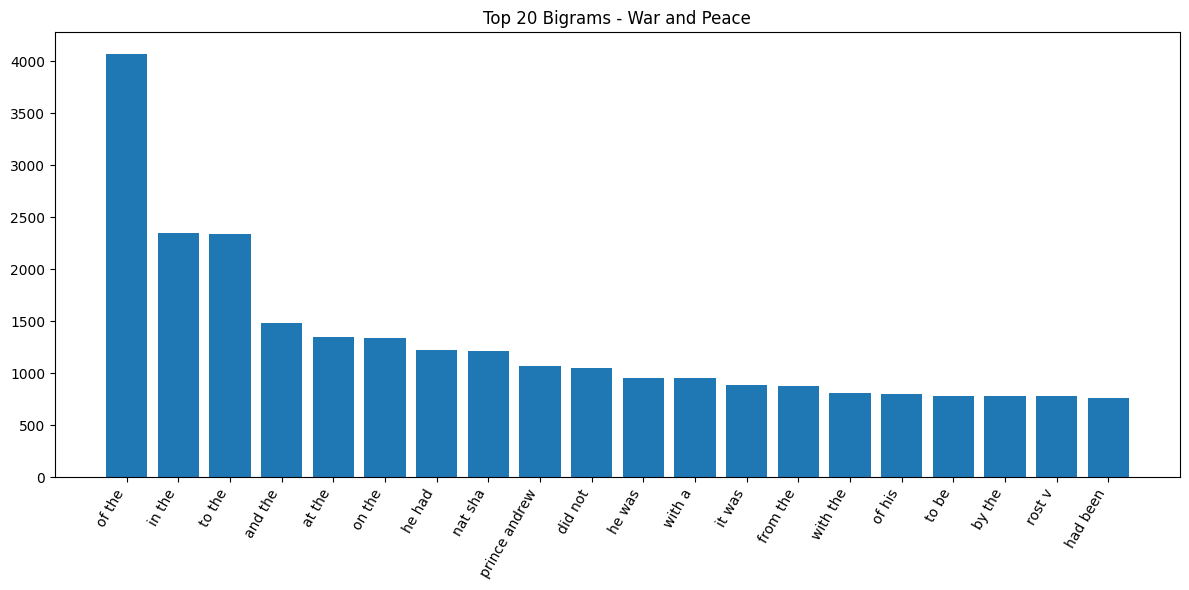

Saved figure: c:\Users\Omen\Documents\GitHub\SecondProject\results\war_bigrams_top20.png


In [14]:
top_war = bigram_counts_war.most_common(20)
labels = [' '.join(bg) for bg, _ in top_war]
values = [c for _, c in top_war]

plt.figure(figsize=(12,6))
plt.bar(range(len(values)), values)
plt.xticks(range(len(labels)), labels, rotation=60, ha='right')
plt.title("Top 20 Bigrams - War and Peace")
plt.tight_layout()
savepath = results_dir / "war_bigrams_top20.png"
plt.savefig(savepath)
plt.show()

print("Saved figure:", savepath)


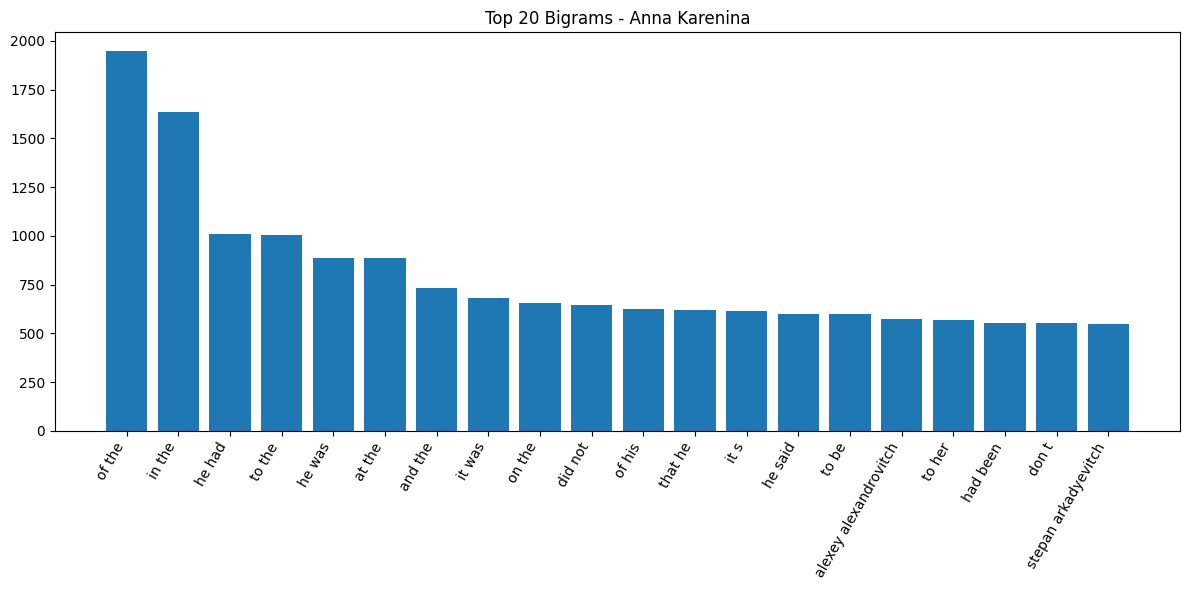

Saved figure: c:\Users\Omen\Documents\GitHub\SecondProject\results\anna_bigrams_top20.png


In [15]:
top_anna = bigram_counts_anna.most_common(20)
labels_a = [' '.join(bg) for bg, _ in top_anna]
values_a = [c for _, c in top_anna]

plt.figure(figsize=(12,6))
plt.bar(range(len(values_a)), values_a)
plt.xticks(range(len(labels_a)), labels_a, rotation=60, ha='right')
plt.title("Top 20 Bigrams - Anna Karenina")
plt.tight_layout()
savepath2 = results_dir / "anna_bigrams_top20.png"
plt.savefig(savepath2)
plt.show()

print("Saved figure:", savepath2)


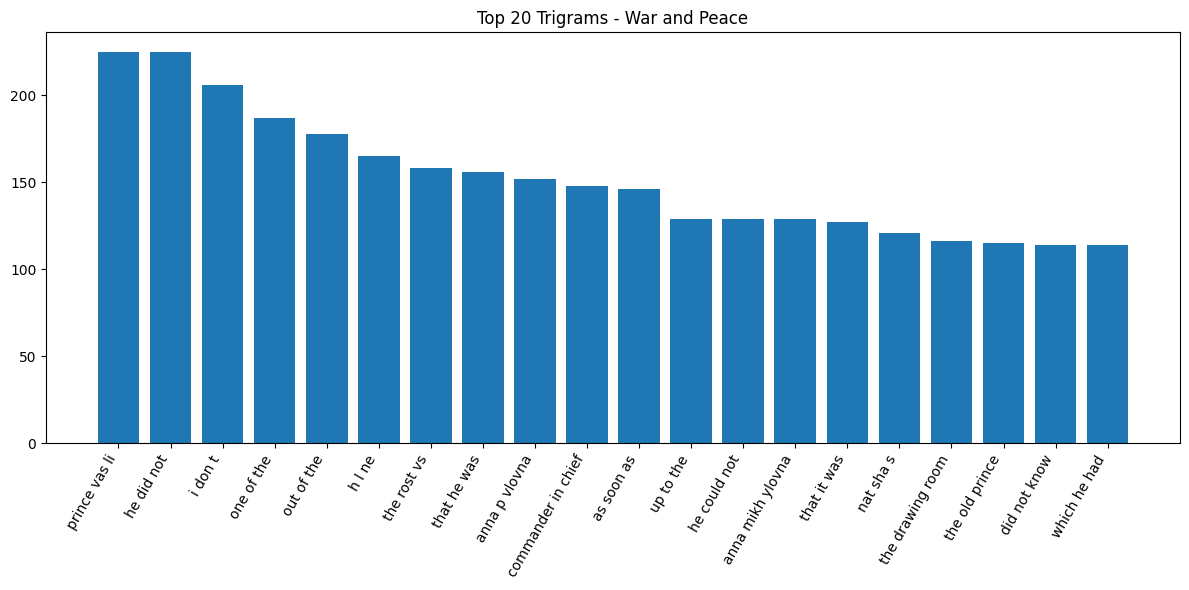

Saved figure: c:\Users\Omen\Documents\GitHub\SecondProject\results\war_trigrams_top20.png


In [16]:
top_tri_war = trigram_counts_war.most_common(20)
labels_t = [' '.join(tg) for tg, _ in top_tri_war]
values_t = [c for _, c in top_tri_war]

plt.figure(figsize=(12,6))
plt.bar(range(len(values_t)), values_t)
plt.xticks(range(len(labels_t)), labels_t, rotation=60, ha='right')
plt.title("Top 20 Trigrams - War and Peace")
plt.tight_layout()
savepath3 = results_dir / "war_trigrams_top20.png"
plt.savefig(savepath3)
plt.show()

print("Saved figure:", savepath3)


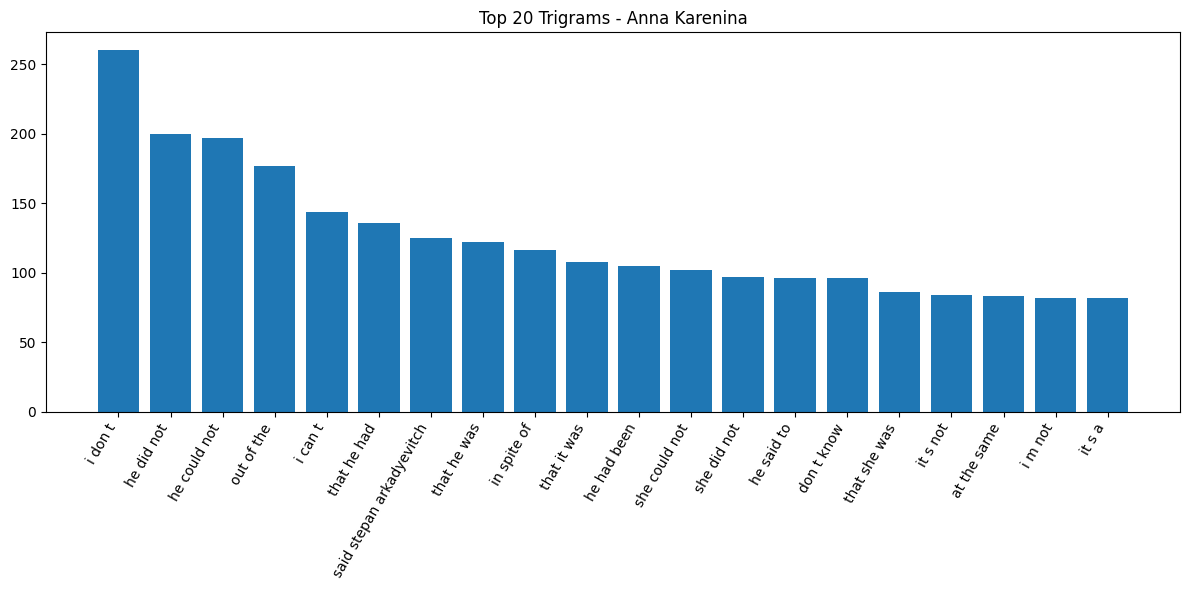

Saved figure: c:\Users\Omen\Documents\GitHub\SecondProject\results\anna_trigrams_top20.png


In [17]:
top_tri_anna = trigram_counts_anna.most_common(20)
labels_ta = [' '.join(tg) for tg, _ in top_tri_anna]
values_ta = [c for _, c in top_tri_anna]

plt.figure(figsize=(12,6))
plt.bar(range(len(values_ta)), values_ta)
plt.xticks(range(len(labels_ta)), labels_ta, rotation=60, ha='right')
plt.title("Top 20 Trigrams - Anna Karenina")
plt.tight_layout()
savepath4 = results_dir / "anna_trigrams_top20.png"
plt.savefig(savepath4)
plt.show()

print("Saved figure:", savepath4)



### 📊 Summary of Comparison
Both books share many common language patterns typical of 19th-century literature.  
* Common bigrams like **'of the'**, **'in the'**, or **'to the'** appear frequently in both.  
* Unique n-grams often reflect thematic differences — *War and Peace* includes more military or political terms, while *Anna Karenina* contains more social and emotional expressions.  
You can analyze further by filtering stopwords or increasing the `n` value for deeper contextual insights.
